### IMPORT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

#### MENTAL ILLNESS
<div style="text-align: justify">
Mental health problems such as depression and anxiety, harassment and bullying are among the biggest mental health problems in the United States. According to National Alliance of Mental Illness of U.S. <b>every 5'th U.S citizen</b> experienced mental illness. Situation in Tech is much worse. According to OSMI (non-profit corporation dedicated to raising awareness, educating, and providing resources to support mental wellness in the tech and open source communities) data, <b>51% of Tech</b> professionals have been diagnosed with a mental health condition.</div>

#### WHY IT IS IMPORTANT
<div style="text-align: justify">
The estimated cost to the global economy is 1 trillion US Dollars per year in lost productivity. A negative working environment may lead to physical and mental health problems, harmful use of substances or alcohol, absenteeism and lost productivity. For every 1 US Dollar put into scaled up treatment for common mental disorders, there is a return of 4 US Dollars in improved health and productivity.*</div>

*WHO Data

#### OBJECTIVE
<div style="text-align: justify">
Is psychological illness at work just a U.S. problem? Does working for a company increase the risk of having these disorders? Are employers doing enough to help their employees? We will try to answer this by analysing the Mental Health Survey in Tech which has been running for several years.</div>

## Dataset & Data Preprocessing

<div style="text-align: justify">
Dataset consist of data from Mental Health Survey in Tech for years 2014-2019 (skipping 2015). Survey itself consist of 76 detailed questions for participants, thus having enough time for analysis one could dive into it really deep. The number of questions has increased year on year, but unfortunately participation in this survey has been decreasing. For some questions, only partial answers are available.</div>

In [2]:
# connect the dataset and list available tables inside dataset
con = sqlite3.connect("mental_health.sqlite")

pd.read_sql('''select name from sqlite_master where type = 'table' ; ''',con)

,name
0,Answer
1,Question
2,Survey


In [7]:
# form pandas datasets from tables
answer_df = pd.read_sql_query('SELECT * FROM Answer', con)
question_df = pd.read_sql_query('SELECT * FROM Question', con)
survey_df = pd.read_sql_query('SELECT * FROM Survey', con)

In [8]:
answer_df

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
...,...,...,...,...
236893,Other,2016,2689,117
236894,Support,2016,2690,117
236895,Back-end Developer,2016,2691,117
236896,DevOps/SysAdmin,2016,2692,117


In [5]:
# change column names from camelcase to lower case

answer_df.columns = [name.lower() for name in answer_df.columns.to_list()]

In [6]:
question_df.head()

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5


In [7]:
survey_df

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


In [8]:
# We can merge 'answer' and 'question' tables by 'question_id'

q_and_a = question_df.merge(answer_df, how='left', on='questionid')

In [9]:
q_and_a.sample(5)

,questiontext,questionid,answertext,surveyid,userid
195570,Do you feel that your employer takes mental he...,91,Yes,2014,239
51747,Is your primary role within your company relat...,13,-1,2016,2392
165494,Did you ever discuss your mental health with a...,72,0,2017,2999
141130,Have you observed or experienced an unsupporti...,56,I've always been self-employed,2017,3035
122404,What country do you work in?,50,Australia,2016,2057


## Exploratory Data Analysis (visuals)

### WHO ARE THE SURVEY RESPONDENTS

<div style="text-align: justify">
The majority of respondents were male, between the ages of <b>24 to 36</b>. Of the <b>4,200</b> respondents, over <b>72%</b> identified themselves as male, whereas <b>24%</b> identified as females and <b>4%</b> as other. <b>Over 2600 (61%)</b> respondents were from the <b>United States</b>. Other significant groups were from the <b>UK (11%)</b>, <b>Canada (less than 5%)</b>, and <b>Germany (3%)</b>. The remaining <b>20%</b> of participants were <b>shared by another 76  world countries</b>.</div>

In [22]:
dataset = pd.read_sql_query(''' SELECT userid, max(age) as age,
                                             min(gender) as gender,
                                             min(country) as country,
                                             min(self_employed) as self_employed,
                                             min(family_history) as family_history,
                                             min(seeked_help) as seeked_help,
                                             min(company_size) as company_size,
                                             min(tech_company) as tech_company,
                                             min(employer_provide_benefits) as employer_provide_benefits,
                                             min(anonymity) as anonymity,
                                             min(mental_health_in_interview) as mental_health_in_interview,
                                             min(you_are_tech) as you_are_tech,
                                             min(discuss_coworkers) as discuss_coworkers,
                                             min(discuss_supervisor) as discuss_supervisor,
                                             min(have_mental_medical_cover) as have_mental_medical_cover,
                                             min(currently_have_disorder) as currently_have_disorder,
                                             min(ever_diagnosed) as ever_diagnosed
                              FROM (
                                SELECT DISTINCT a.questionid, a.userid,
                                CASE WHEN a.questionid = 1 THEN a.answertext END AS age,
                                CASE WHEN a.questionid = 2 THEN a.answertext END AS gender,
                                CASE WHEN a.questionid = 3 THEN a.answertext END AS country,
                                CASE WHEN a.questionid = 5 THEN a.answertext END AS self_employed,
                                CASE WHEN a.questionid = 6 THEN a.answertext END AS family_history,
                                CASE WHEN a.questionid = 7 THEN a.answertext END AS seeked_help,
                                CASE WHEN a.questionid = 8 THEN a.answertext END AS company_size,
                                CASE WHEN a.questionid = 9 THEN a.answertext END AS tech_company,
                                CASE WHEN a.questionid = 10 THEN a.answertext END AS employer_provide_benefits,
                                CASE WHEN a.questionid = 11 THEN a.answertext END AS anonymity,
                                CASE WHEN a.questionid = 12 THEN a.answertext END AS mental_health_in_interview,
                                CASE WHEN a.questionid = 13 THEN a.answertext END AS you_are_tech,
                                CASE WHEN a.questionid = 18 THEN a.answertext END AS discuss_coworkers,
                                CASE WHEN a.questionid = 19 THEN a.answertext END AS discuss_supervisor,
                                CASE WHEN a.questionid = 20 THEN a.answertext END AS have_mental_medical_cover,
                                CASE WHEN a.questionid = 32 THEN a.answertext END AS currently_have_disorder,
                                CASE WHEN a.questionid = 33 THEN a.answertext END AS ever_diagnosed
                                FROM answer as a
                                GROUP BY a.userid, a.questionid)
                              GROUP BY userid
                              ''', con)

In [4]:
dataset['age'] = dataset['age'].astype('int64')
dataset['gender'] = dataset['gender'].str.lower()
dataset['country'] = dataset['country'].replace("United States of America", 'United States')

In [21]:
dataset

,QuestionID,UserID,age,gender,country,self_employed,family_history,seeked_help,company_size,tech_company,employer_provide_benefits,anonymity,mental_health_in_interview,you_are_tech,discuss_coworkers,discuss_supervisor,have_mental_medical_cover,currently_have_disorder,ever_diagnosed
0,1,1,37,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,2,1,None,Female,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,3,1,None,None,United States,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,4,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,5,1,None,None,None,-1,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234635,85,4218,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
234636,86,4218,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
234637,87,4218,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
234638,88,4218,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


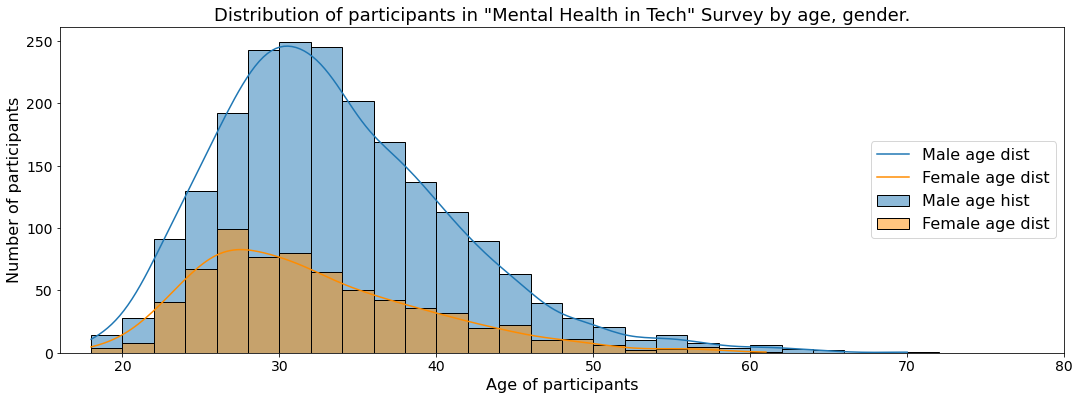

In [12]:
age_filter = (dataset.age >= 18) & (dataset.age < 100) & (dataset.tech_company=='1')
x1 = dataset.age[age_filter][dataset.gender=='male']
x2 = dataset.age[age_filter][dataset.gender=='female']

hist_data = [x1, x2]

palette = ['#1F77B4','darkorange']
fig, ax = plt.subplots(figsize=(18,6))
for a, color in zip(hist_data, palette):
    sns.histplot(a, bins=range(0, 100, 2), ax=ax, kde=True, color=color, legend=True)
ax.set_xlim([16, 80])

ax.legend(['Male age dist', 'Female age dist', 'Male age hist', 'Female age dist'], fontsize=16, loc=5)
ax.set_ylabel('Number of participants', fontsize=16)
ax.set_xlabel('Age of participants', fontsize=16)
ax.set_title('Distribution of participants in "Mental Health in Tech" Survey by age, gender.', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

We may see that female workers in tech company are slightly younger than male.

Tech Industry has been and still is a male-dominated field for a very long time. Even with corporates actively encouraging females for tech positions, women holds only 17% of major technology jobs, including programming or software development<sup><b>1</b></sup>.<br>

(1) [Source: World Economic Forum](https://www.weforum.org/agenda/2022/02/women-gender-technology-economy-representation-equality#:~:text=Currently%2C%20women%20hold%20only%2017,representation%3B%20tracking%20percentages%20of%20representation)

In [13]:
gender_of_participants = pd.read_sql_query('''SELECT gender, years, COUNT(*) as count
                                              FROM (SELECT
                                                        CASE WHEN LOWER(answertext) = 'male' THEN 'male'
                                                             WHEN LOWER(answertext) = 'female' THEN 'female'
                                                             WHEN LOWER(answertext) like '%trans%' OR
                                                                  LOWER(answertext) like '%binary%' OR
                                                                  LOWER(answertext) like '%queer%' OR
                                                                  LOWER(answertext) LIKE '%fluid%'
                                                             THEN 'other' END AS gender, surveyid years
                                                    FROM Answer
                                                    WHERE questionid=2) as sub1
                                              WHERE gender != 'None'
                                              GROUP BY gender, years''', con)

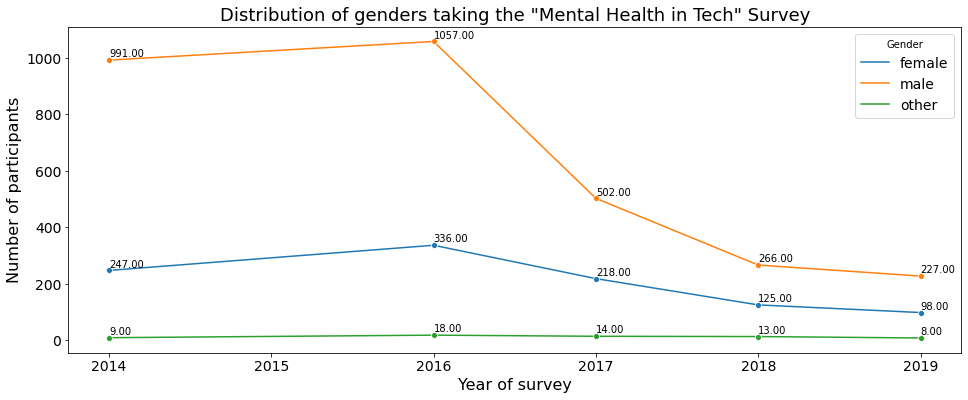

In [14]:
fig, ax = plt.subplots(figsize=(16, 6))

gender_dist = sns.lineplot(data=gender_of_participants, x='years', y='count', hue='gender', marker="o")

for item in gender_of_participants.groupby('gender'):
    for x,y in item[1][['years','count']].values:
        ax.text(x,y+12,f'{y:.2f}')

ax.set_ylabel('Number of participants', fontsize=16)
ax.set_xlabel('Year of survey', fontsize=16)
ax.set_title('Distribution of genders taking the "Mental Health in Tech" Survey', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, title='Gender')
plt.show()

<div style="text-align: justify">
In the graph above, we can see that the total number of participants has decreased significantly over the years, most of them male. The number of women interviewed remained largely unchanged. The numbers of the opposite sex were so small that it was difficult to discern a pattern because they were few throughout the period.</div>

<div style="text-align: justify">
When completing the survey, <b>almost 42%</b> said they currently have a mental disorder, while <b>nearly 22%</b> said they weren't sure if that was the case, while according to National Alliance of Mental Illness of U.S., <b>21%</b> of U.S. adults experienced mental illness in 2020<sup><b>2</b></sup>. Reminding that 61% of participants are from US. This is way more! The fact that 22% do not know if they have a mental disorder is worrying.</div><br>

(2) [Source: National Alliance of Mental Illness of U.S.](https://www.nami.org/mhstats)

In [15]:
currently_have_disorder = pd.read_sql_query(''' SELECT answertext as currently_have, COUNT(*) as count
                                                FROM answer
                                                WHERE questionid = 33
                                                GROUP BY answertext
                                                ORDER BY count''', con)

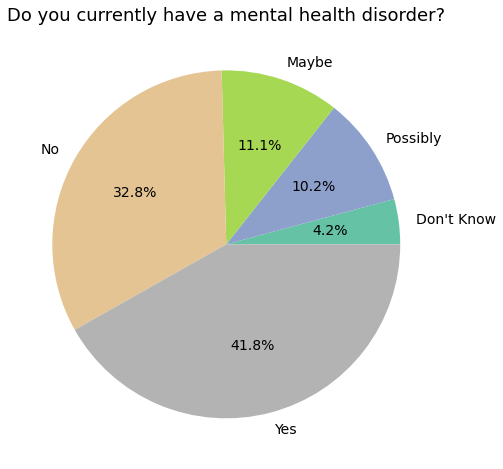

In [16]:
currently_have_disorder['count'].plot(
    kind='pie',
    figsize=(12, 8),
    textprops={'fontsize': 14},
    autopct='%1.1f%%',
    colormap='Set2',
    labels=currently_have_disorder['currently_have'])

plt.title("Do you currently have a mental health disorder?", fontsize=18)
plt.ylabel("")
plt.show()

Additionally, only **57%** on average said they would seek treatment from a psychiatrist.

In [17]:
total_amount_and_looking_help = pd.read_sql_query('''SELECT a.surveyid as years,
                                                            COUNT(*) as participants,
                                                            looking_help*100.0/COUNT(*) as looking_help_pct
                                                     FROM answer as a
                                                     JOIN (SELECT COUNT(answertext) as looking_help, surveyid as years
                                                           FROM answer
                                                           WHERE questionid = 7 AND answertext = 1
                                                           GROUP BY 2) as sub1
                                                     ON a.surveyid = sub1.years
                                                     WHERE questionid = 1
                                                     GROUP BY a.surveyid
                                                     ORDER BY a.surveyid''', con)

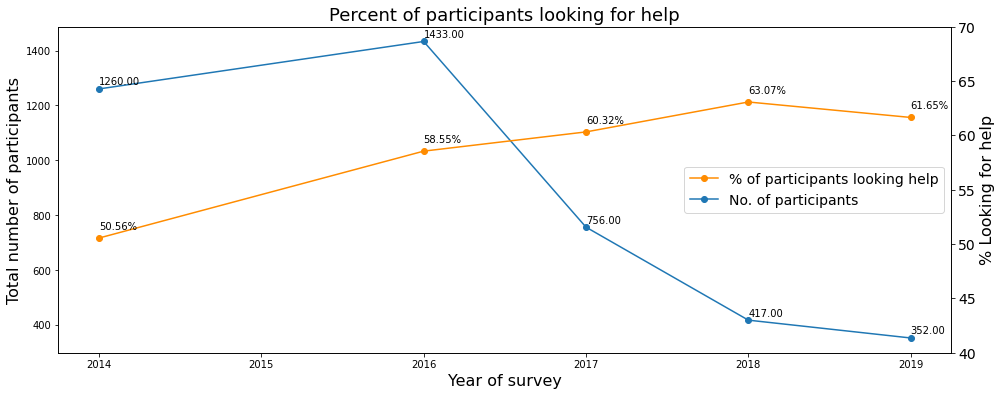

In [18]:
f, ax1 = plt.subplots(figsize=(16, 6))

palette = ['#1F77B4','darkorange']

ax1.plot(
    total_amount_and_looking_help['years'],
    total_amount_and_looking_help['participants'],
    marker="o",
    label="No. of participants")

ax2 = ax1.twinx()

ax2.plot(
    total_amount_and_looking_help['years'],
    total_amount_and_looking_help['looking_help_pct'],
    color='darkorange',
    marker="o",
    label='% of participants looking help')

for x, y in total_amount_and_looking_help[['years', 'participants']].values:
    ax1.text(x,y+15,f'{y:.2f}')
for x, y in total_amount_and_looking_help[['years', 'looking_help_pct']].values:
    ax2.text(x,y+0.8,f'{y:.2f}%')

ax1.set_ylabel('Total number of participants', fontsize=16)
ax2.set_ylabel('% Looking for help', fontsize=16)
ax1.set_xlabel('Year of survey', fontsize=16)
ax1.set_title('Percent of participants looking for help', fontsize=18)
ax2.set_ylim([40, 70])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax1.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=5, fontsize=14)
plt.show()

Does having a mental health disorder somehow correlates wether person is self-employed or works for an organisation?

In [19]:
org_or_self_curr_have = pd.read_sql_query(''' SELECT a.answertext is_self_employed, sub1.currently_have, a.userid
                                                        FROM answer as a
                                                        JOIN (SELECT answertext currently_have, userid
                                                                FROM answer
                                                                WHERE questionid = 33
                                                                GROUP BY 2) as sub1
                                                        ON a.userid = sub1.userid
                                                        WHERE questionid = 5 AND answertext != -1
                                                        GROUP BY a.userid''', con)

In [20]:
org_or_self_curr_have = pd.DataFrame(org_or_self_curr_have.groupby(['is_self_employed', 'currently_have'])[['is_self_employed', 'currently_have']].value_counts().unstack())
org_or_self_curr_have = org_or_self_curr_have.drop(['Possibly', 'Maybe', "Don't Know"], axis=1)

In [21]:
def calc_pct(a, b):
    return (a / (a + b)) * 100

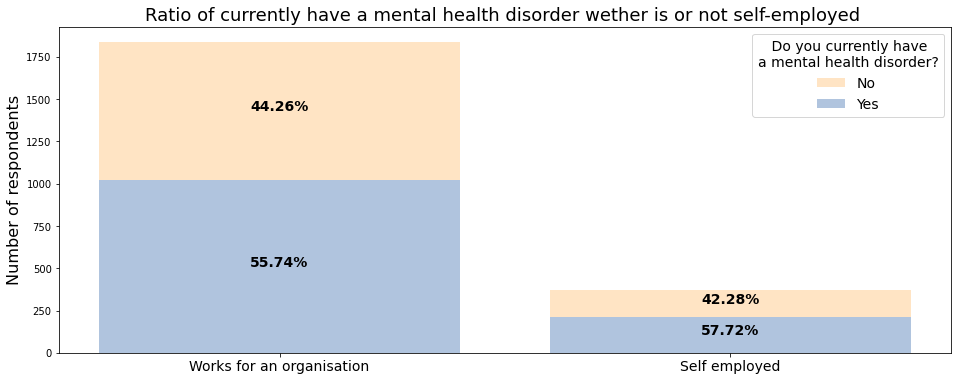

In [22]:
fig, ax = plt.subplots(figsize=(16, 6))

plot1 = ax.bar(
    org_or_self_curr_have.index,
    org_or_self_curr_have['No'],
    width=0.8,
    bottom=org_or_self_curr_have['Yes'],
    color='bisque',
    label='No')

plot2 = ax.bar(
    org_or_self_curr_have.index,
    org_or_self_curr_have['Yes'],
    width=0.8,
    color='lightsteelblue',
    label='Yes')
org_pct = [round(calc_pct(org, self), 2) for org, self in zip(plot1.datavalues, plot2.datavalues)]
self_pct = [round(calc_pct(self, org), 2) for org, self in zip(plot1.datavalues, plot2.datavalues)]

ax.set_xticks(ax.get_xticks())
ax.set_ylabel('Number of respondents', fontsize=16)
ax.set_title('Ratio of currently have a mental health disorder wether is or not self-employed ', fontsize=18)
ax.set_xticklabels(['Works for an organisation', 'Self employed'], fontsize=14)

plt.legend(title='''   Do you currently have
a mental health disorder?''', fontsize=14, title_fontsize=14)

for j, bar in enumerate(plot1):
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    ax.text(
        x+width/2,
        y+height/2,
        str(org_pct[j])+'%',
        ha='center',
        weight='bold',
        fontsize=14)

for j, bar in enumerate(plot2):
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    ax.text(
        x+width/2,
        y+height/2,
        str(self_pct[j])+'%',
        ha='center',
        weight='bold',
        fontsize=14)

Or maybe the larger the company the more difficult mental environment?

In [23]:
currently_have_by_company_size = pd.DataFrame(dataset.groupby(['company_size'])['currently_have_disorder'].value_counts()).iloc[6:,:].drop('-1', level=1).unstack()
currently_have_by_company_size.columns = currently_have_by_company_size.columns.droplevel(level=0)

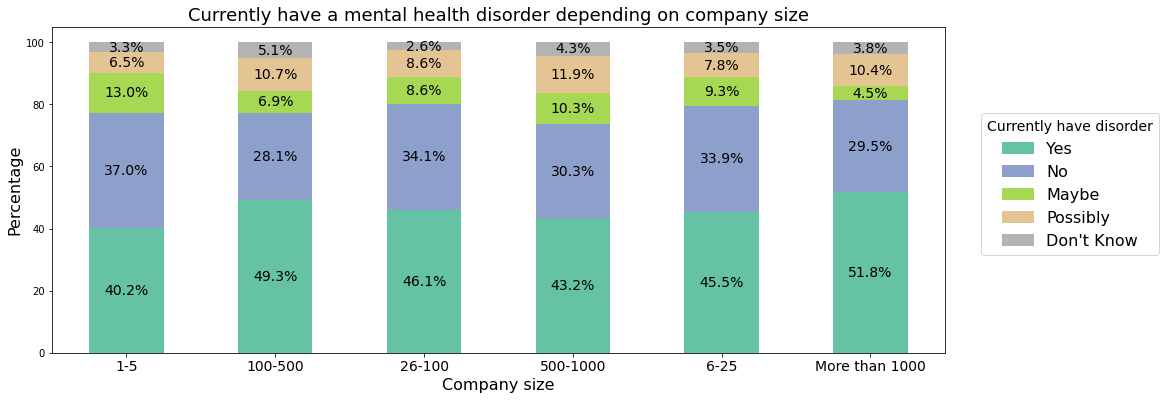

In [24]:
currently_have_by_company_size = currently_have_by_company_size.apply(lambda x: x*100/sum(x), axis=1)

ax = currently_have_by_company_size.plot(kind='bar', stacked=True, figsize=(16,6), colormap='Set2')
labels = [f'{round(i, 1)}%' for i in currently_have_by_company_size.values.flatten(order="F")]

for i, patch in enumerate(ax.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    ax.annotate(labels[i], (x, y), ha='center', va='center', c='black', fontsize=14)
plt.legend(title='Currently have disorder', loc=(1.04, 0.3), fontsize=16, title_fontsize=14)
ax.set_xlabel('Company size', fontsize=16)
ax.set_ylabel('Percentage', fontsize=16)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,
    horizontalalignment='center',
    fontsize=14)
ax.set_title('Currently have a mental health disorder depending on company size', fontsize=18)
plt.show()

<div style="text-align: justify">
Well, at least we cannot condemn employers on the basis of this data sample. But do they do enough to help their employeys? Do employers offer mental health support? World Health Organisation encourage organizations to promote mental health in the workplace<sup><b>3</b></sup>.</div><br>


(3) [Source: World Health Organisation](https://www.who.int/teams/mental-health-and-substance-use/promotion-prevention/mental-health-in-the-workplace)

To evaluate employers support for  mental wellbeeing we'll choose: 
* Anonymity criteria if person chooses to take advantage of resources provided by your employer
* Benefits, like healthcare coverage for a mental health professional

<div style="text-align: justify">
The graph below shows the percentage of respondents who expressed confidence that their employers provide mental health support in the workplace. The rest of the respondents were unaware of support at work. Only about <b>27%</b> guaranteed for their anonymity, and about 25% were unaware that their employer offered mental health services.</div>

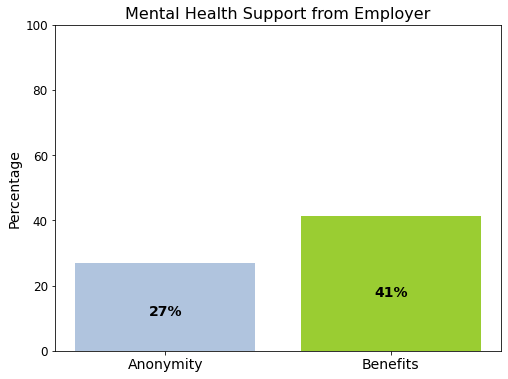

In [25]:
anonymity_guaranteed = dataset['anonymity'][dataset['anonymity'] == 'Yes'].value_counts().agg('int')/len(dataset)*100
benefits_guaranteed = dataset['employer_provide_benefits'][dataset['employer_provide_benefits'] == 'Yes'].value_counts().agg('int')/len(dataset)*100
x_axis = ['Anonymity', 'Benefits']
y_axis = [anonymity_guaranteed, benefits_guaranteed]
my_colors = ['lightsteelblue', 'yellowgreen','bisque']

ax = plt.figure(figsize=(8, 6))

plot = plt.bar(x_axis, y_axis, color=my_colors)

for j, p in enumerate(plot):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*0.4,
             str(round(y_axis[j]))+'%',
             ha='center',
             weight='bold',
             fontsize=14)

plt.ylabel('Percentage', fontsize=14)
plt.title('Mental Health Support from Employer', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.ylim([0, 100])
plt.show()

<div style="text-align: justify">
People more willingly talking about their physical health than their mental health. However, most people are less likely to share their mental health disorder because of the stereotype. Only sligthly above <b>4%</b> of participants thinks <b>physical health</b> issues could cause negative consequences, while <b>23%</b> respondents said discussing <b>mental illness</b> would have more negative impact, furthermore, <b>38%</b> are more likely to agree than to disagree, confirming that discussions in the workplace are considered more acceptable for physical health issues rather than for mental health.</div>

Do you think that discussing a <b>mental health disorder</b> with your employer would have negative consequences?

In [26]:
physical_negative = pd.DataFrame(q_and_a['answertext'][q_and_a['questionid'] == 90].value_counts()).drop('-1')
mental_negative = pd.DataFrame(q_and_a['answertext'][q_and_a['questionid'] == 98].value_counts())

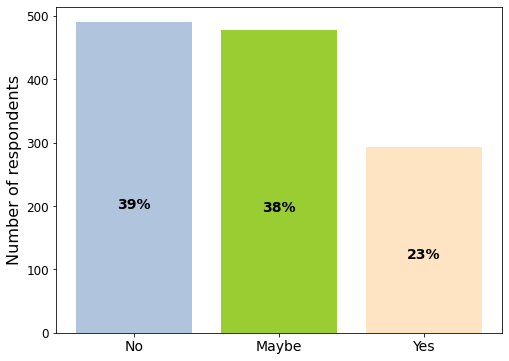

In [27]:
plt.figure(figsize=(8, 6))

plot = plt.bar(
    mental_negative.index,
    mental_negative['answertext'],
    color=my_colors)

pct = [round(x*100/mental_negative['answertext'].agg('sum')) for x in plot.datavalues]

for j, p in enumerate(plot):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*0.4,
             str(pct[j])+'%',
             ha='center',
             weight='bold',
             fontsize=14)

plt.ylabel('Number of respondents', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

Do you think that discussing a **physical health issue** with your employer would have negative consequences?

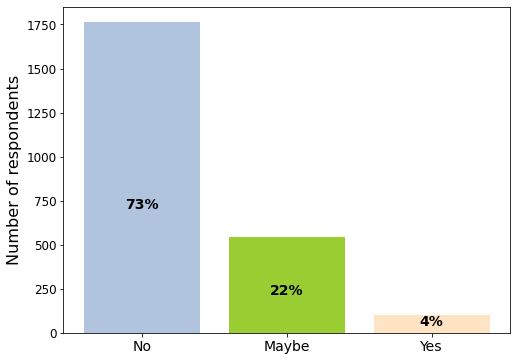

In [28]:
plt.figure(figsize=(8, 6))

plot = plt.bar(
    physical_negative.index,
    physical_negative['answertext'],
    color=my_colors)

pct = [round(x*100/physical_negative['answertext'].agg('sum')) for x in plot.datavalues]

for j, p in enumerate(plot):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*0.4,
             str(pct[j])+'%',
             ha='center',
             weight='bold',
             fontsize=14)

plt.ylabel('Number of respondents', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

Let's take a look at the replies for mental condition from different countries.

In [29]:
countries = pd.DataFrame({'total':dataset.country.value_counts().head(10)})

In [30]:
currently_have = pd.DataFrame(dataset.groupby(['country'])['currently_have_disorder'].value_counts().unstack().iloc[:, 1:])

ever_had = pd.DataFrame(dataset.groupby(['country'])['ever_diagnosed'].value_counts().unstack())

In [31]:
countries_currently_have = countries.merge(currently_have, left_index=True, right_index=True).drop(columns=['total'], axis=1).fillna(1)
countries_currently_have = countries_currently_have[['Yes','No', 'Possibly', 'Maybe', "Don't Know"]]

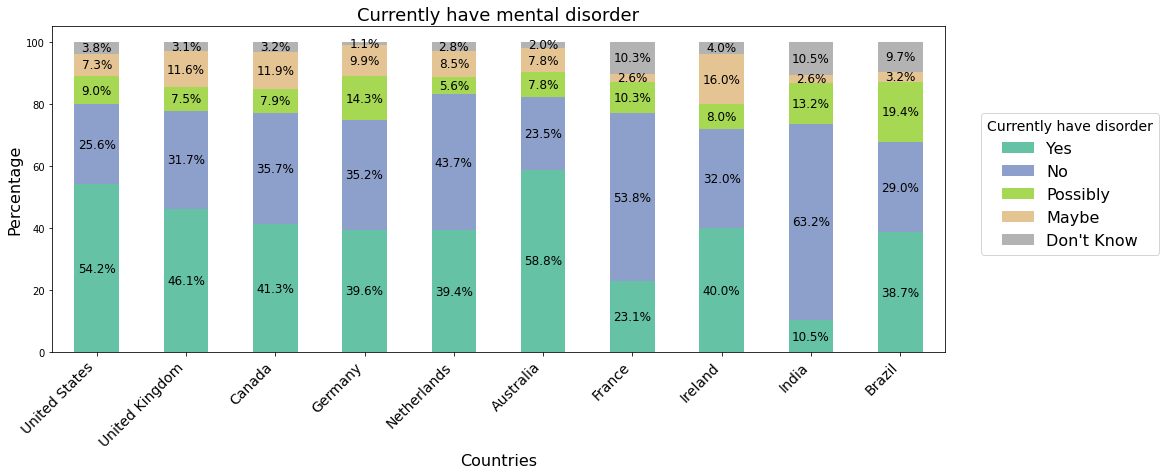

In [32]:
countries_currently_have = countries_currently_have.apply(lambda x: x*100/sum(x), axis=1)

ax = countries_currently_have.plot(kind='bar', stacked=True, figsize=(16,6), colormap='Set2')
labels = [f'{round(i, 1)}%' for i in countries_currently_have.values.flatten(order="F")]

for i, patch in enumerate(ax.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    ax.annotate(labels[i], (x, y), ha='center', va='center', c='black', fontsize=12)
plt.legend(title='Currently have disorder', loc=(1.04, 0.3), fontsize=16, title_fontsize=14)
ax.set_xlabel('Countries', fontsize=16)
ax.set_ylabel('Percentage', fontsize=16)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize=14)
ax.set_title('Currently have mental disorder', fontsize=18)
plt.show()

<div style="text-align: justify">
Results a bit varying but in general keeps similar level, except France and India, but keep in mind that there are very little participants in countries other than U.S., UK, Canada and Germany. Even France and India result looks promising, but for example, India is represented from only 50 participants results, thus these levels could change.</div>

<div style="text-align: justify">
One thing we can say with some certainty is that <b>59%</b> of respondents who said they had a family history of mental illness admitted to having them themselves, while only <b>18%</b> are cases without family history background. </div>

In [33]:
family_yes = pd.DataFrame({'family_history_yes':dataset['ever_diagnosed'][dataset['family_history'] == 'Yes'].value_counts()}).transpose()
family_no = pd.DataFrame({'family_history_no':dataset['ever_diagnosed'][dataset['family_history'] == 'No'].value_counts()}).transpose()
family_history = pd.concat([family_yes, family_no], axis=0)

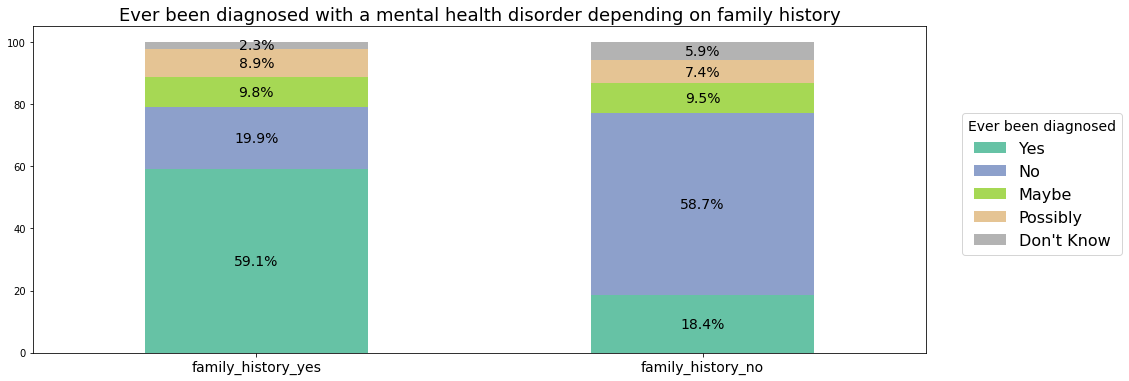

In [34]:
family_history = family_history.apply(lambda x: x*100/sum(x), axis=1)

ax = family_history.plot(kind='bar', stacked=True, figsize=(16,6), colormap='Set2')
labels = [f'{round(i, 1)}%' for i in family_history.values.flatten(order="F")]

for i, patch in enumerate(ax.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    ax.annotate(labels[i], (x, y), ha='center', va='center', c='black', fontsize=14)
plt.legend(title='Ever been diagnosed', loc=(1.04, 0.3), fontsize=16, title_fontsize=14)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,
    horizontalalignment='center',
    fontsize=14)
ax.set_title('Ever been diagnosed with a mental health disorder depending on family history', fontsize=18)
plt.show()

## Conclusions

<div style="text-align: justify">
Various studies around the world have shown that mental health influences productivity. Depression and anxiety have a significant economic impact; the estimated cost to the global economy is 1 trillion US Dollars per year in lost productivity. Harassment and bullying at work are commonly reported problems, and can have a substantial adverse impact on mental health<sup><b>4</b></sup>. For this particular reason it is very important for employees to get the support for their mental health disorder.</div>
<br>
<div style="text-align: justify">
This short analysis of the Mental Health in Tech Survey dataset shows that much more work needs to be done for everybody and  for employers especially. People are still afraid to talk about their mental state with employers. People are still afraid that admitting they have mental health problems will negatively affect their career prospects and/or will be condemned by the colleagues.</div>
<br>
<div style="text-align: justify">
It is worth mentioning that this dataset ends just before Covid-19 period starts, which I think has really broadened the range of people with psychological disorders. Furthermore, dataset is very strongly influenced by the data from U.S. where the public health system is very specific, which I believe has an impact on people seeking help from professionals.</div><br>

(4) [Source: World Health Organisation](https://www.who.int/teams/mental-health-and-substance-use/promotion-prevention/mental-health-in-the-workplace)